# Importing Modules

In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as pyt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score,f1_score, confusion_matrix

In [128]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [129]:
df.shape

(614, 13)

In [130]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [131]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [132]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

# Data Manipulation

In [133]:
#for data manipulating we have to fill null values of both numerical and categorical values
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [134]:
df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [135]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [136]:
#Here we can see that there are 4 missing values in categorical variables ('Gender','Married','Dependents','Self_Employed)
#and 3 missing values in non-categorical variables('Loan_Amount','Loan_Amount_Term','Credit_History')
#to remove missing values from categorical variables (replace it with mode) 
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [137]:
#to remove missing values from non-categorical variables(replace it with mean)
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [138]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [139]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [140]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [141]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


# Data Exploration

<AxesSubplot:xlabel='Gender', ylabel='count'>

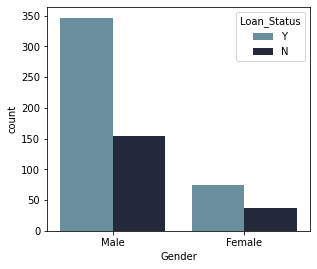

In [142]:
#Exploration of categorical variables
pyt.figure(figsize = (16, 14))
pyt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

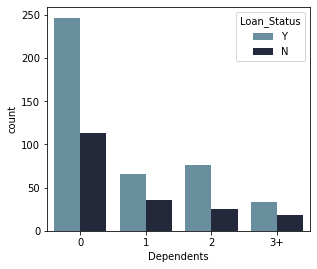

In [143]:
pyt.figure(figsize = (16, 14))
pyt.subplot(332)
sns.countplot(df['Dependents'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

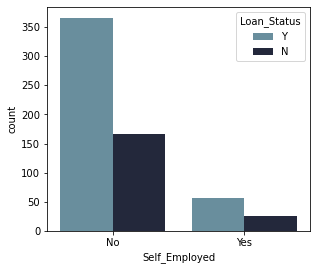

In [144]:
pyt.figure(figsize = (16, 14))
pyt.subplot(333)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")

<AxesSubplot:xlabel='Married', ylabel='count'>

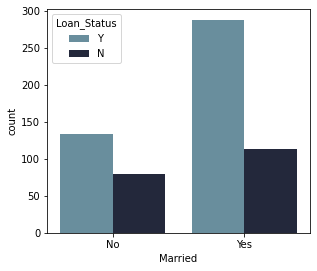

In [145]:
pyt.figure(figsize = (16, 14))
pyt.subplot(334)
sns.countplot(df['Married'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

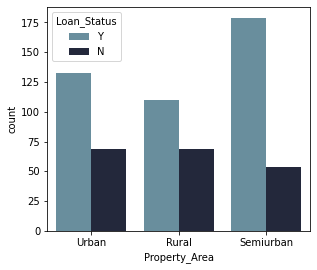

In [146]:
pyt.figure(figsize = (16, 14))
pyt.subplot(335)
sns.set_palette("Set1", 10)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")

<AxesSubplot:xlabel='Education', ylabel='count'>

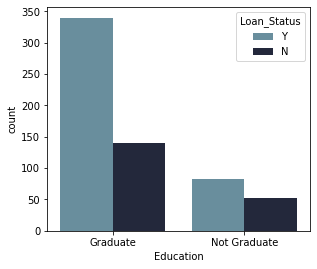

In [147]:
pyt.figure(figsize = (16, 14))
pyt.subplot(336)
sns.countplot(df['Education'],hue=df['Loan_Status'],palette="ch:r=-.26,l=.52")

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

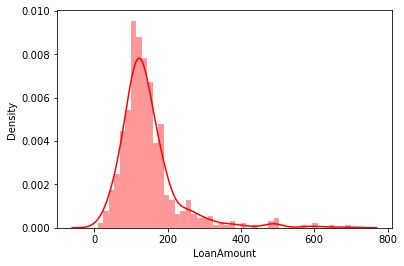

In [148]:
#exploration for non categorical variables
sns.distplot(df['LoanAmount'],color="red")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

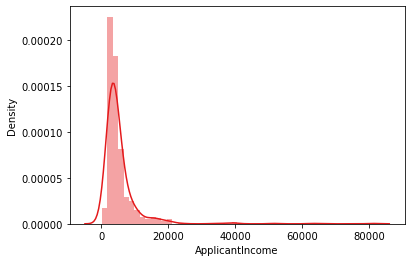

In [149]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

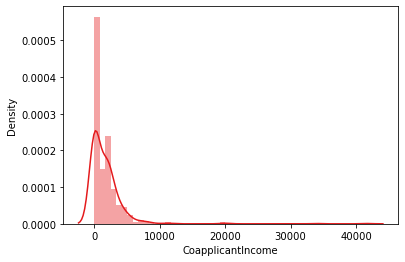

In [150]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

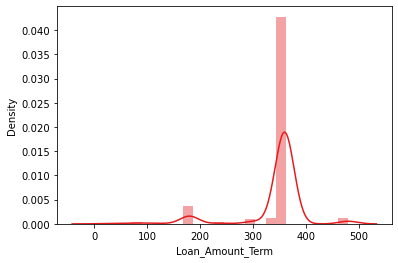

In [151]:
sns.distplot(df['Loan_Amount_Term'])

# Adding new attributes 

In [152]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [153]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [154]:
#to find emi and interest rates

# Performing log transformation on non-categorical graphs

<AxesSubplot:xlabel='ApplicantIncome_log', ylabel='Density'>

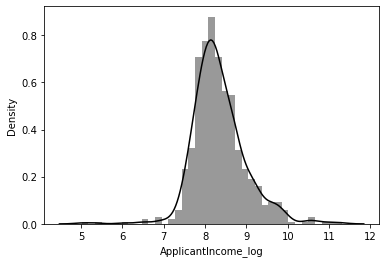

In [155]:
#since all graph of non-categorical variables is left skewed so we are performing log transformations
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])
#sns.FacetGrid(sns.distplot(df['ApplicantIncome_log']),hue=df['Loan_Status'],size=5).add_legend()
#map(sns.distplot(df['ApplicantIncome_log']),df['Loan_Status'])

sns.distplot(df['ApplicantIncome_log'],color='black')


<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

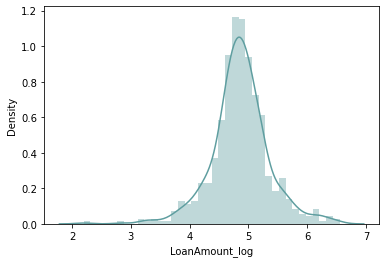

In [156]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_log'],color='cadetblue')

<AxesSubplot:xlabel='Loan_Amount_Term_log', ylabel='Density'>

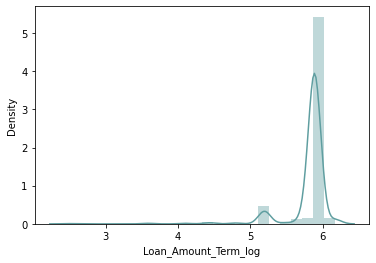

In [157]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_log'],color='cadetblue')

<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

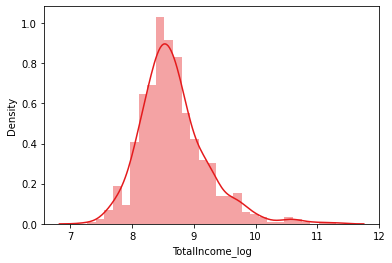

In [158]:
df['TotalIncome_log']=np.log(df['TotalIncome'])
#pyt.pie(df['TotalIncome_log'])
sns.distplot(df['TotalIncome_log'])

# Data Preparation for model building 
sklearn requires all inputs to be numeric,so we should convert all our categorical variables into numeric by encoding the categories.

In [159]:
cat_list=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for variables in cat_list:
    label_encoding=preprocessing.LabelEncoder()
    df[variables]=label_encoding.fit_transform(df[variables].astype('str'))


In [160]:
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
TotalIncome             0
ApplicantIncome_log     0
LoanAmount_log          0
Loan_Amount_Term_log    0
TotalIncome_log         0
dtype: int64

In [161]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [162]:
colum=['ApplicantIncome_log','LoanAmount_log','Loan_Amount_Term_log','TotalIncome_log']
df.drop(colum,axis=1,inplace=True)


In [163]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,2,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,2,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,2,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,2,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,2,2,1,6000.0


# Model Building

In [164]:
df['type']="Train"
test['type']="Test"
#combining both dataset
complete_data=pd.concat([df,test],axis=0)
complete_data.isnull().sum()


Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
Loan_Status          367
TotalIncome          367
type                   0
dtype: int64

In [165]:
#Identifying categorical and continous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
categorical_columns = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [166]:
#removing missing values from complete_data
complete_data['Gender'].fillna(complete_data['Gender'].mode()[0],inplace=True)
complete_data['Married'].fillna(complete_data['Married'].mode()[0],inplace=True)
complete_data['Loan_Amount_Term'].fillna(complete_data['Loan_Amount_Term'].mode()[0],inplace=True)
complete_data['Dependents'].fillna(complete_data['Dependents'].mode()[0],inplace=True)
complete_data['Credit_History'].fillna(complete_data['Credit_History'].mode()[0],inplace=True)
complete_data['Self_Employed'].fillna(complete_data['Self_Employed'].mode()[0],inplace=True)
complete_data['LoanAmount'].fillna(complete_data['LoanAmount'].mean(), inplace=True)
complete_data['Loan_Status'].fillna(complete_data['Loan_Status'].mean(), inplace=True)
#complete_data['LoanAmount_log'].fillna(complete_data['LoanAmount_log'].mean(), inplace=True)
complete_data['Loan_Amount_Term'].fillna(complete_data['Loan_Amount_Term'].mean(), inplace=True)
complete_data['ApplicantIncome'].fillna(complete_data['ApplicantIncome'].mean(), inplace=True)
complete_data['CoapplicantIncome'].fillna(complete_data['CoapplicantIncome'].mean(), inplace=True)
complete_data['TotalIncome'].fillna(complete_data['TotalIncome'].mean(), inplace=True)

In [167]:
complete_data['TotalIncome']=complete_data['ApplicantIncome'] + complete_data['CoapplicantIncome']

complete_data['TotalIncome_log'] = np.log(complete_data['TotalIncome'])


In [168]:
complete_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
type                 0
TotalIncome_log      0
dtype: int64

In [169]:
complete_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,type,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,2.0,2,1.0,5849.0,Train,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,2.0,0,0.0,6091.0,Train,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,2.0,2,1.0,3000.0,Train,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,2.0,2,1.0,4941.0,Train,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,2.0,2,1.0,6000.0,Train,8.699515


In [170]:
#ROC dict for TPR and FPR values
roc_dict = {}

#precision recall curve
prc_dict = {}


def modify_roc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for ROC metrics
    """
    
    fpr, tpr, thresholds = roc_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    
    clf_roc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    
    dict_modify[name] = clf_roc_dict
    
def modify_prc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for precision recall metrics
    """
    
    precision, recall, thresholds = precision_recall_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    clf_prc_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    
    dict_modify[name] = clf_prc_dict

# Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [172]:
# X is the input and Y is the output
#x=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

X=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married','Gender','Education','Self_Employed','Property_Area','Dependents']].values
y=df[["Loan_Status"]].values

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [174]:
model.fit(X_train,y_train)

LogisticRegression()

In [175]:
new_input = [[1,1,1,1,1,1,1,1,1,1,1]]
# get prediction for new input
new_output = (model.predict(new_input))
#newpoutput=new_output.replace({1:'Yes',0:'No'})
# summarize input and output
print(new_input,new_output)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]] [1]


In [176]:
model.score(X_train,y_train)*100

78.55477855477857

In [177]:
model.score(X_test,y_test)*100

80.54054054054053

In [178]:
expected = y_test
predicted = model.predict(X_test)

In [179]:
#  Printing the Report

print(metrics.classification_report(expected, predicted))


              precision    recall  f1-score   support

           0       0.71      0.49      0.58        51
           1       0.83      0.93      0.87       134

    accuracy                           0.81       185
   macro avg       0.77      0.71      0.73       185
weighted avg       0.80      0.81      0.79       185



In [180]:
# Out of 51 'Y' outcomes, 23 were right and 28 were wrong similarly, for'N', 131 were right and 3 were wrong.

print(metrics.confusion_matrix(expected, predicted))


[[ 25  26]
 [ 10 124]]


In [181]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression',
                dict_modify=prc_dict)

# RandomForest

In [182]:
# Importing libraries and classes

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()

In [183]:
# Training the model

model1.fit(X_train,y_train)


RandomForestClassifier()

In [184]:
# Accuracy in training the model

model1.score(X_train,y_train)

1.0

In [185]:
#Accuracy in testing the model

model1.score(X_test,y_test)

0.8

In [186]:
# Y contains all the outputs and X contains all the inputs. We will test on the machine if it gives to expected Output for the 
# corresponding Inputs.

expected = y_test
predicted = model1.predict(X_test)

In [187]:
# Generating Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.72      0.45      0.55        51
           1       0.82      0.93      0.87       134

    accuracy                           0.80       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.79      0.80      0.78       185



In [188]:
# Output in the form of Matrix
print(metrics.confusion_matrix(expected, predicted))

[[ 23  28]
 [  9 125]]


In [189]:
#metrics for lr
modify_roc_dict(clf=model1,
                y_test=y_test,
                X_test=X_test,
                name='Random Forest', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model1,
                y_test=y_test,
                X_test=X_test,
                name='Random Forest',
                dict_modify=prc_dict)

# DecisionTree

In [190]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [191]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [192]:
model.score(X_train,y_train)

1.0

In [193]:
model.score(X_test,y_test)

0.772972972972973

In [194]:
expected = y_test
predicted = model.predict(X_test)

In [195]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57        51
           1       0.83      0.86      0.85       134

    accuracy                           0.77       185
   macro avg       0.71      0.70      0.71       185
weighted avg       0.77      0.77      0.77       185



In [196]:
print(metrics.confusion_matrix(expected, predicted))

[[ 28  23]
 [ 19 115]]


In [197]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Decision Tree', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Decision Tree',
                dict_modify=prc_dict)

# Gradient Boosting Classifier

In [198]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()

In [199]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [200]:
model.score(X_train,y_train)

0.9020979020979021

In [201]:
model.score(X_test,y_test)

0.7945945945945946

In [202]:
expected = y_test
predicted = model.predict(X_test)

In [203]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54        51
           1       0.81      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.68      0.70       185
weighted avg       0.78      0.79      0.78       185



In [204]:
print(metrics.confusion_matrix(expected, predicted))

[[ 22  29]
 [  9 125]]


In [205]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='gboost', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='gboost',
                dict_modify=prc_dict)

# KNN

In [206]:

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [207]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [208]:
model.score(X_train,y_train)

0.7435897435897436

In [209]:
model.score(X_test,y_test)

0.6270270270270271

In [210]:
expected = y_test
predicted = model.predict(X_test)

In [211]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.29      0.24      0.26        51
           1       0.73      0.78      0.75       134

    accuracy                           0.63       185
   macro avg       0.51      0.51      0.50       185
weighted avg       0.61      0.63      0.62       185



In [212]:
print(metrics.confusion_matrix(expected, predicted))

[[ 12  39]
 [ 30 104]]


In [213]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='KNN', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='KNN',
                dict_modify=prc_dict)

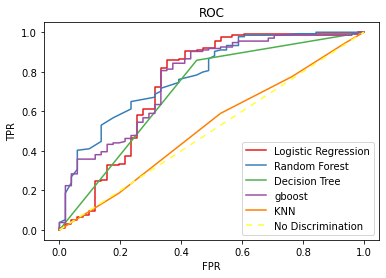

In [214]:
for key in roc_dict:
    clf = roc_dict[key]
    pyt.plot(clf['fpr'], clf['tpr'], label=key)
pyt.xlabel("FPR")
pyt.ylabel("TPR")
pyt.title("ROC")
pyt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(4, 4))
#pyt.savefig(os.path.join('roc_curve_all_models.png'))
pyt.legend()
pyt.show()

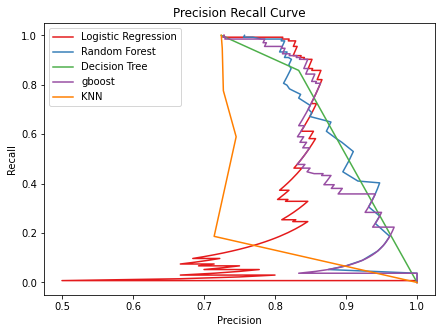

In [215]:
pyt.figure(figsize = (7, 5))
for key in prc_dict:
    clf = prc_dict[key]
    pyt.plot(clf['precision'], clf['recall'], label=key)
    

pyt.xlabel("Precision")
pyt.ylabel("Recall")
pyt.title("Precision Recall Curve")
#plt.savefig(os.path.join('plots/prc_curve_all_models.png'))

pyt.legend()

pyt.show()

In [216]:

import joblib

joblib.dump(model,'loan_predict_model.ml')

['loan_predict_model.ml']

In [217]:
import pickle
pickle.dump(model,open('modelfinal.pkl','wb'))